# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
heart=pd.read_csv("heart.csv")

# Take a Quick Look at the Data Structure

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## About the data

sex==> 1=male,2=female

cp==> chest pain type

trestbps==>resting blood pressure (in mm Hg on admission to the hospital)

chol==>serum cholestoral in mg/dl

fbs==>(fasting blood sugar & gt; 120 mg/dl) (1 = true; 0 = false)

restecg==>resting electrocardiographic results

thalach==>maximum heart rate achieved

exang==>exercise induced angina (1 = yes; 0 = no)

oldpeak==>ST depression induced by exercise relative to rest

slope==>the slope of the peak exercise ST segment

ca==>number of major vessels (0-3) colored by flourosopy

thal==> 1 = normal; 2 = fixed defect; 3 = reversable defect

target=> 1=disease ,0=no disease

In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [8]:
x = heart.iloc[:,0:-1].values
y = heart.iloc[:, -1].values

In [9]:
x.shape

(1025, 13)

In [10]:
heart.shape

(1025, 14)

In [11]:
y.shape

(1025,)

## Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## Training the K-NN model on the Training set

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classiffier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classiffier.fit(x_train,y_train)

KNeighborsClassifier()

In [15]:
y_pred=classiffier.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[106  17]
 [ 14 120]]


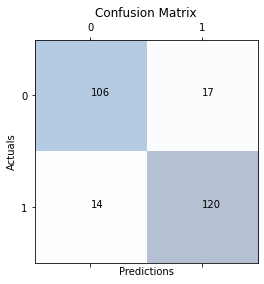

In [17]:
plt.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')


for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i,s=cm[i, j])

In [18]:
from sklearn import metrics

accuracy=metrics.accuracy_score(y_test,y_pred)
f1_score=metrics.f1_score(y_test,y_pred)
precision=metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
print(f'KNN model Accuracy:{100*accuracy:.3}%')
print (f'KNN model f1_score: {100*f1_score:.3} %')
print (f'KNN model precision: {100*precision:.3} %')
print (f'KNN model recall: {100*recall:.3}  %')

KNN model Accuracy:87.9%
KNN model f1_score: 88.6 %
KNN model precision: 87.6 %
KNN model recall: 89.6  %


In [19]:
error_rate = []
k_vals = range(1,40)

for i in k_vals:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

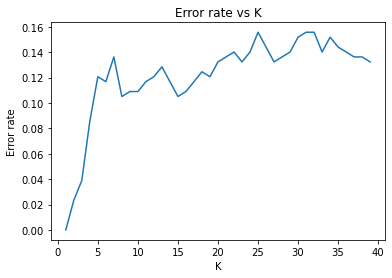

In [20]:
plt.plot(k_vals, error_rate)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error rate')

## Splitting the dataset into the Training set and Test set

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

## Without Feature Scaling

## Training the K-NN model on the Training set

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classiffier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classiffier.fit(x_train,y_train)

KNeighborsClassifier()

In [23]:
y_pred=classiffier.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[96 27]
 [39 95]]


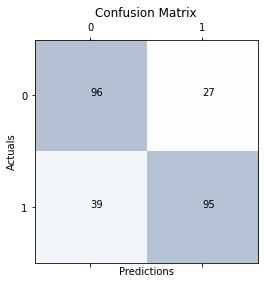

In [25]:
plt.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')


for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i,s=cm[i, j])

In [26]:
from sklearn import metrics

accuracy=metrics.accuracy_score(y_test,y_pred)
f1_score=metrics.f1_score(y_test,y_pred)
precision=metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print(f'KNN model Accuracy:{100*accuracy:.3}%')
print (f'KNN model f1_score: {100*f1_score:.3} %')
print (f'KNN model precision: {100*precision:.3} %')
print (f'KNN model recall: {100*recall:.3}  %')

KNN model Accuracy:74.3%
KNN model f1_score: 74.2 %
KNN model precision: 77.9 %
KNN model recall: 70.9  %


In [27]:
error_rate = []
k_vals = range(1,40)

for i in k_vals:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

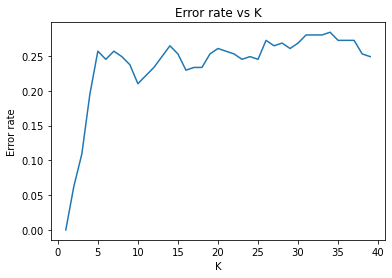

In [28]:
plt.plot(k_vals, error_rate)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error rate')

## Splitting the dataset into the Training set and Test set

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## SVM Algorithm

In [31]:
from sklearn import svm
SVM_model=svm.SVC() 
SVM_model.fit(x_train,y_train)

SVC()

In [32]:
y_pred=SVM_model.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[116   7]
 [  2 132]]


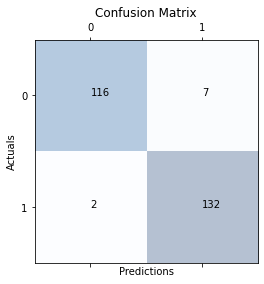

In [34]:
plt.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')


for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i,s=cm[i, j])

In [35]:
from sklearn import metrics

accuracy=metrics.accuracy_score(y_test,y_pred)
f1_score=metrics.f1_score(y_test,y_pred)
precision=metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print(f'SVM model Accuracy:{100*accuracy:.3}%')
print (f'SVM model f1_score: {100*f1_score:.3} %')
print (f'SVM model precision: {100*precision:.3} %')
print (f'SVM model recall: {100*recall:.3}  %')

SVM model Accuracy:96.5%
SVM model f1_score: 96.7 %
SVM model precision: 95.0 %
SVM model recall: 98.5  %


## Training the SVM model on the Training set Without Feature Scaling

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [37]:
from sklearn import svm
SVM_model=svm.SVC() 
SVM_model.fit(x_train,y_train)

SVC()

In [38]:
y_pred=SVM_model.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 86  37]
 [ 27 107]]


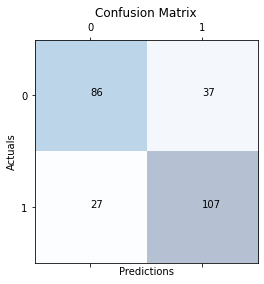

In [40]:
plt.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')


for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i,s=cm[i, j])

In [41]:
from sklearn import metrics

accuracy=metrics.accuracy_score(y_test,y_pred)
f1_score=metrics.f1_score(y_test,y_pred)
precision=metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print(f'SVM model Accuracy:{100*accuracy:.3}%')
print (f'KNN model f1_score: {100*f1_score:.3} %')
print (f'SVM model precision: {100*precision:.3} %')
print (f'SVM model recall: {100*recall:.3}  %')

SVM model Accuracy:75.1%
KNN model f1_score: 77.0 %
SVM model precision: 74.3 %
SVM model recall: 79.9  %


## Splitting the dataset into the Training set and Test set

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [44]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(random_state=0)
logmodel.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [45]:
y_pred=logmodel.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 77  21]
 [  7 100]]


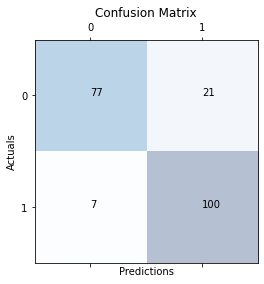

In [47]:
plt.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')


for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i,s=cm[i, j])

In [48]:
from sklearn import metrics

accuracy=metrics.accuracy_score(y_test,y_pred)
f1_score=metrics.f1_score(y_test,y_pred)
precision=metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print(f'logictic regression model Accuracy:{100*accuracy:.3}%')
print (f'logictic regression model f1_score: {100*f1_score:.3} %')
print (f'logictic regression model precision: {100*precision:.3} %')
print (f'logictic regression model recall: {100*recall:.3}  %')

logictic regression model Accuracy:86.3%
logictic regression model f1_score: 87.7 %
logictic regression model precision: 82.6 %
logictic regression model recall: 93.5  %


## Splitting the dataset into the Training set and Test set

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## Training the Decision Tree Classifier model on the whole dataset

In [51]:
from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
Classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [52]:
y_pred=Classifier.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 98   0]
 [  0 107]]


7asa hna fe 7aga 8alt

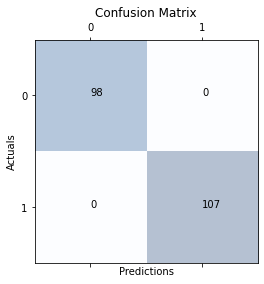

In [54]:
plt.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')


for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i,s=cm[i, j])

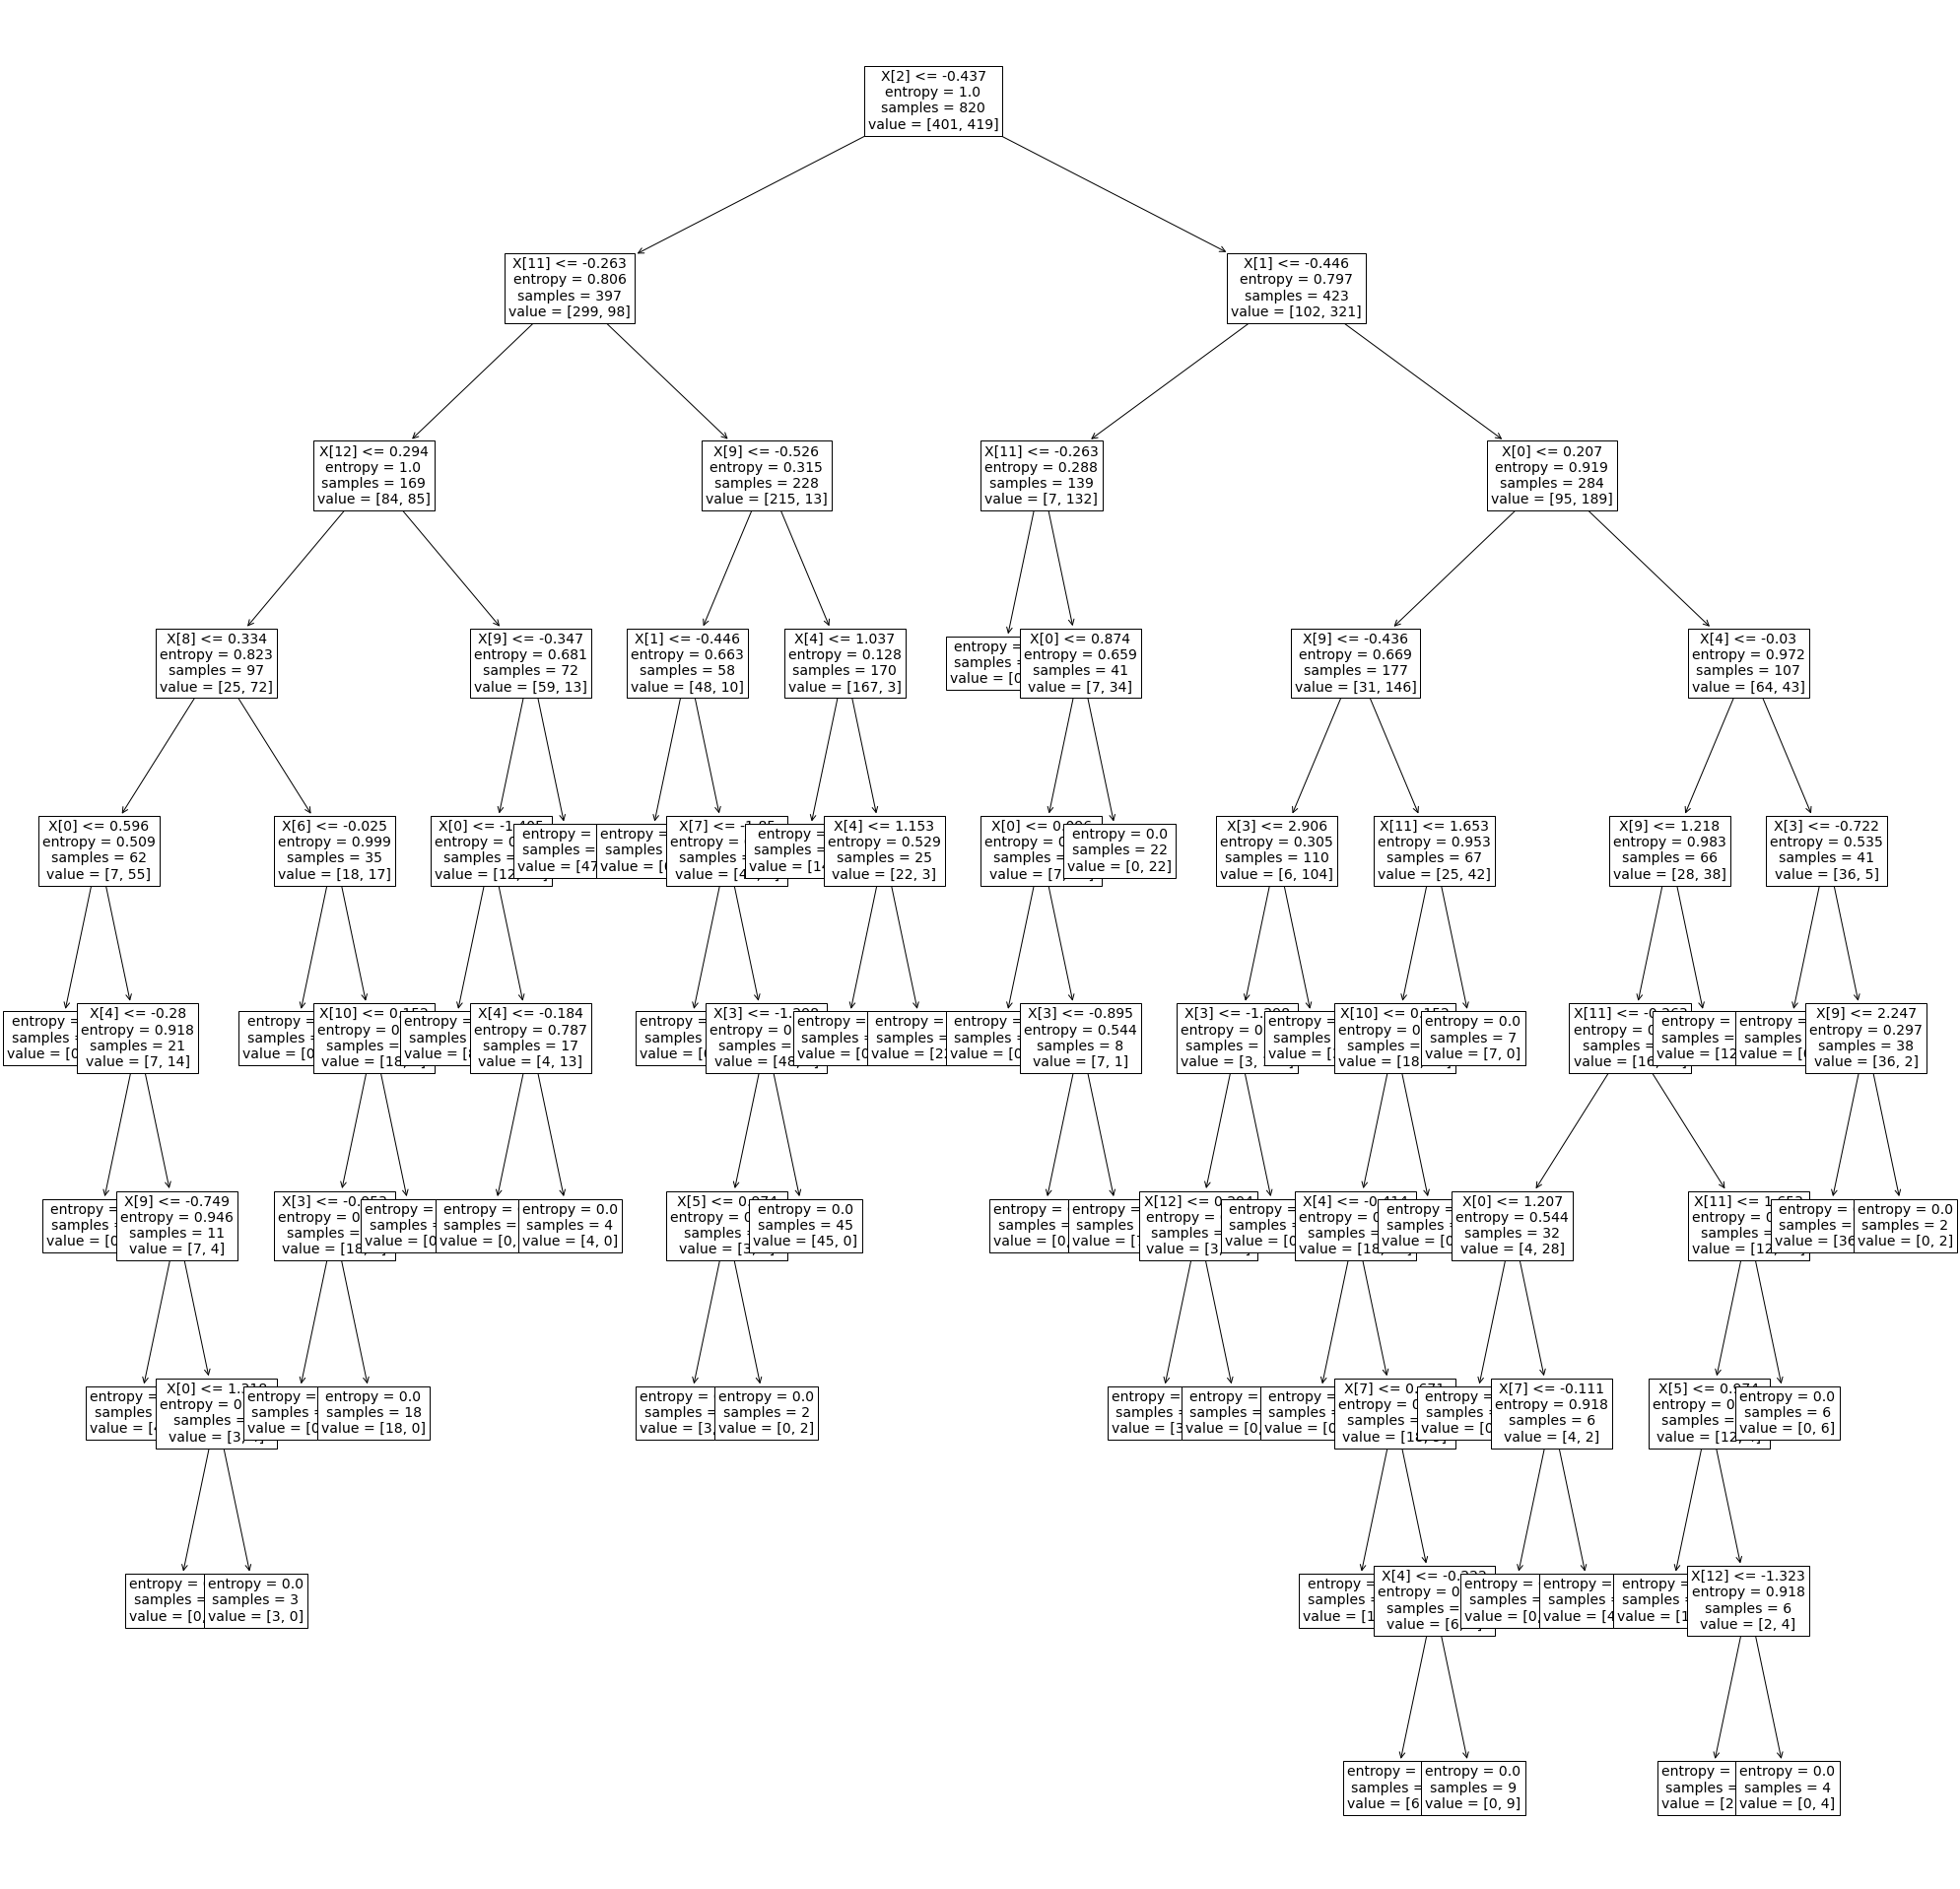

In [55]:
from sklearn import tree
fig,ax=plt.subplots(figsize=(35,35))
tree.plot_tree(Classifier,fontsize=14)
plt.show()

In [56]:
x = heart.drop(['target'], axis = 1)

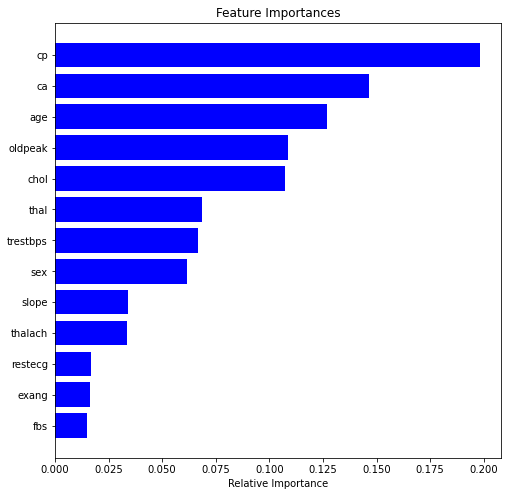

In [57]:
plt.subplots(figsize=(8,8))
features = x.columns
importances = Classifier.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Splitting the dataset into the Training set and Test set

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [59]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

## Training the  Random Forest Classifier model on the dataset

In [60]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier() 
RF_model.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
y_pred=RF_model.predict(x_test)

In [62]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[ 98   0]
 [  0 107]]


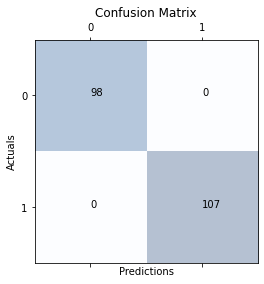

In [63]:
plt.matshow(cf_matrix, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')


for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        plt.text(x=j, y=i,s=cf_matrix[i, j])

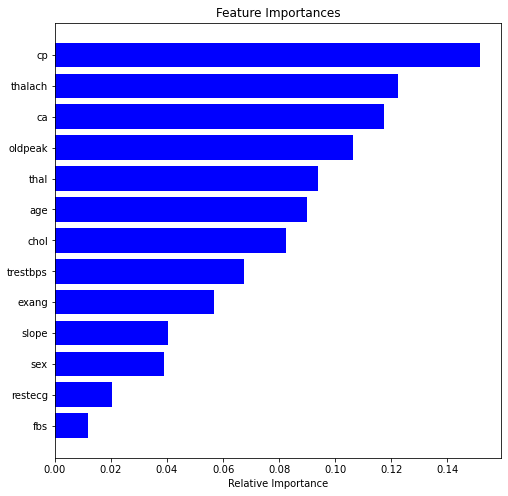

In [64]:
plt.subplots(figsize=(8,8))
features = x.columns
importances = RF_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Splitting the dataset into the Training set and Test set

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Training the XGBoost model on the dataset

In [66]:
from xgboost import XGBClassifier

XGB_model=XGBClassifier() 
XGB_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [67]:
y_pred=XGB_model.predict(x_test)

In [68]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[ 98   0]
 [  0 107]]


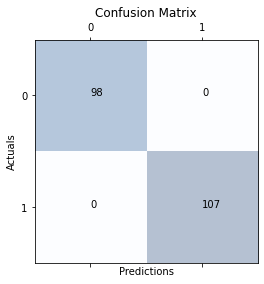

In [69]:
plt.matshow(cf_matrix, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')


for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        plt.text(x=j, y=i,s=cf_matrix[i, j])

## Splitting the dataset into the Training set and Test set

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [71]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

## Training the Naive Bayes model on the Training set

In [72]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [73]:
y_pred = classifier.predict(x_test)

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[79 19]
 [11 96]]


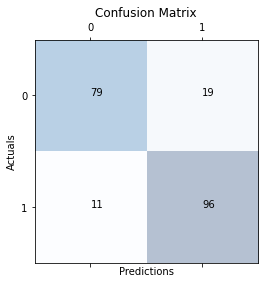

In [75]:
plt.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')


for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i,s=cm[i, j])

In [77]:
from sklearn import metrics

accuracy=metrics.accuracy_score(y_test,y_pred)
f1_score=metrics.f1_score(y_test,y_pred)
precision=metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'Naive Bayes Accuracy: {100*accuracy:.3} %')
print (f'Naive Bayes f1_score: {100*f1_score:.3} %')
print (f'Naive Bayes precision: {100*precision:.3} %')
print (f'Naive Bayes recall: {100*recall:.3}  %')

Naive Bayes Accuracy: 85.4 %
Naive Bayes f1_score: 86.5 %
Naive Bayes precision: 83.5 %
Naive Bayes recall: 89.7  %
